Name : Sahil Bhagwan Patil

Roll No : BE21IT022

PRN : 72280580C

Class : BE IT A

# Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [2]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

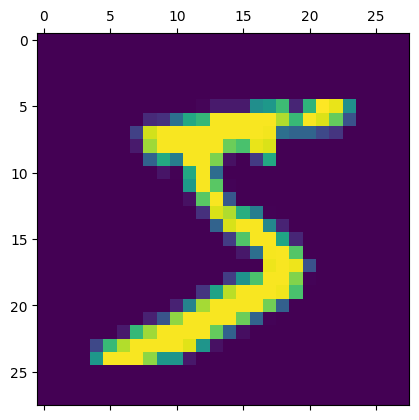

In [3]:
#to see how first image looks
plt.matshow(x_train[0])

In [4]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

C:\python 3.10\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [7]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model

In [8]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7366 - loss: 1.0228 - val_accuracy: 0.9019 - val_loss: 0.3615
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9044 - loss: 0.3516 - val_accuracy: 0.9185 - val_loss: 0.2959
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9147 - loss: 0.3021 - val_accuracy: 0.9273 - val_loss: 0.2628
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9243 - loss: 0.2711 - val_accuracy: 0.9317 - val_loss: 0.2421
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9300 - loss: 0.2440 - val_accuracy: 0.9368 - val_loss: 0.2245
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9379 - loss: 0.2276 - val_accuracy: 0.9412 - val_loss: 0.2070
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9420 - loss: 0.2082 - val_accuracy: 0.9444 - val_loss: 0.1938
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9454 - loss: 0.1975 - 

# Evaluate the model

In [9]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.1916
Loss = 0.164
Accuracy = 0.953


# Make prediction on new data

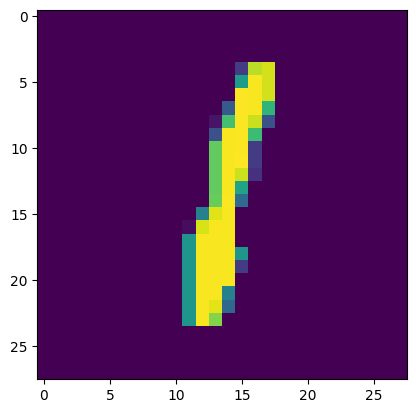

In [10]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [11]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 967    0    1    1    0    3    6    1    1    0]
 [   0 1115    2    2    0    1    4    2    9    0]
 [   5    2  984    6    7    2    8    9    8    1]
 [   0    1   10  966    0   11    1   11    7    3]
 [   1    1    5    1  932    0   10    2    4   26]
 [  10    2    1   21    3  828   10    2    9    6]
 [   8    3    2    0    8    9  925    1    2    0]
 [   0    8   26    6    3    1    0  972    1   11]
 [   4    4    5   14    6    7   11   10  909    4]
 [   9    8    1   14   23    5    1    8    3  937]], shape=(10, 10), dtype=int32)
